In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

import random

http://blogs.lanacion.com.ar/data/visualizaciones/simulando-cuantos-sobres-hacen-falta-para-llenar-el-album-del-mundial/

## Cuántos sobres se necesitan para llenar el album usando Python?

En nuestro caso, la simulación tendrá como objetivo medir cuántos sobres (de 5 figuritas cada uno) se necesitan para llenar un álbum de 669 figuritas

In [54]:
dado = random.randint(1, 6)
print(dado)

5


In [53]:
print(*range(669))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [45]:
#para modelar el sobre utilizaremos la funcion sample. 
sobre = random.sample(range(669), 5)
print(sobre)

[220, 563, 239, 465, 202]


In [13]:
#las constantes de la simulacion
FIGURITAS_POR_PAQUETE = 5
FIGURITAS_POR_ALBUM = 669
CANTIDAD_DE_CORRIDAS = 1000

In [14]:
simulacion = np.empty(CANTIDAD_DE_CORRIDAS)

In [ ]:
time.strftime("%H:%M:%S")

In [17]:
#voy a realizar tantas corridas como dice la constante CANTIDAD_DE_CORRIDAS
for i in range(CANTIDAD_DE_CORRIDAS):

    #modelo el album vacio como un vector lleno de ceros
    album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

    #en esta variable contabilizare cuantos sobres se necesitan 
    cantidad_de_sobres = 0

    #voy abriendo sobres nuevos hasta llenar el album
    #si el vector contiene algun 0 en alguna posicion significa 
    #que aun no esta completo esa condicion la podemos expresar de muchas 
    #formas la que elegi es min(album) == 0, 
    #tambien podria ser len( album [ album == 0 ] ) > 0 
    while min(album) == 0:

        #un nuevo sobre formado por figuritas tomadas de manera aleatoria
        sobre = random.sample(range(FIGURITAS_POR_ALBUM), FIGURITAS_POR_PAQUETE)

        #voy llenando el album
        #sumo 1 en cada posicion correspondiente a cada una de las figuritas 
    #del sobre
    #
    #Nota: para quienes conocen otros lenguajes de programacion, esta 
    #operacion puede llegar a causar confusion. La libreria NumPy permite
    #realizar operaciones sobre multiples indices a la vez. 
    #Aprovechenla, es muy util.
        album[sobre] += 1

        #incremento la cantidad de sobres en 1
        cantidad_de_sobres += 1

    #para llenar este album he necesitado tantos sobres como 
    #lo dice cantidad_de_sobres
    simulacion[i] = cantidad_de_sobres

In [ ]:
time.strftime("%H:%M:%S")

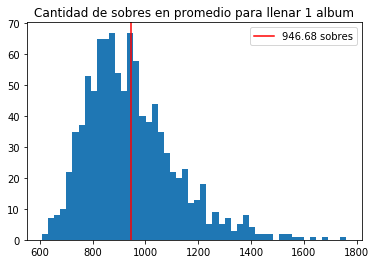

In [18]:
#cuantos sobres necesitamos en promedio para llenar el album
sobres_promedio = simulacion.mean()

#visualizamos la simulacion con un histograma de las corridas
plt.hist(simulacion, bins=50)
plt.axvline(sobres_promedio, color='r')
plt.legend(["%.2f sobres" % sobres_promedio])
plt.title("Cantidad de sobres en promedio para llenar 1 album")
plt.show()

In [19]:
print("Llenar el album costará... %2.f pesos. Y qué hago con las %d repetidas!" % (sobres_promedio * 15, sobres_promedio * FIGURITAS_POR_PAQUETE - FIGURITAS_POR_ALBUM))

Llenar el album costará... 14200 pesos. Y qué hago con las 4064 repetidas!


In [20]:
CANTIDAD_DE_ALBUMES = 20


In [22]:
#inicializo el vector simulacion_grupo con 2 dimensiones 
simulacion_grupo = np.zeros([CANTIDAD_DE_ALBUMES+1, 
                             CANTIDAD_DE_CORRIDAS], dtype=int)

In [ ]:
time.strftime("%H:%M:%S")

In [23]:
#voy a realizar muchas corridas, tantas como dice la constante CANTIDAD_DE_CORRIDAS
for i in range(CANTIDAD_DE_CORRIDAS):

  #modelo el album vacio como un vector lleno de ceros
  album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

  #en esta variable contabilizare cuantos sobres se necesitan para llenar 1..n albumes
  cantidad_de_sobres = 0

  #aqui voy a contabilizar cuando albumes estan llenos
  albumes_llenos = 0

  #a diferencia de la simulacion anterior, la condicion de corte sera cuando se 
  #llenen los n albumes. Eso lo podemos expresar asi:
  #albumes_llenos < CANTIDAD_DE_ALBUMES
  while albumes_llenos < CANTIDAD_DE_ALBUMES:

    #un nuevo sobre formado por figuritas tomadas de manera aleatoria
    sobre = random.sample(range(FIGURITAS_POR_ALBUM), FIGURITAS_POR_PAQUETE)

    #voy llenando los albumes
    album[sobre] += 1

    #incremento la cantidad de sobres en 1
    cantidad_de_sobres += 1    

    #si el min(album) se incremento, significa que se ha llenado un nuevo album. 
    if albumes_llenos < min(album):      
      #hemos llenado un album nuevo
      albumes_llenos = min(album)

      #registramos la cantidad de sobres
      simulacion_grupo[albumes_llenos, i] = cantidad_de_sobres

In [ ]:
time.strftime("%H:%M:%S")

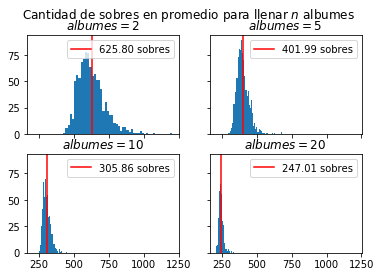

In [24]:
#cuantos sobres necesitamos en promedio para llenar n-albumes
#usamos una matriz de histogramas

amigos = [2, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)

for ax, q in zip(axes.flat, amigos):
  simulacion = simulacion_grupo[q]/q
  sobres_promedio = simulacion.mean()
  ax.set_title('$albumes=%d $' % (q))
  ax.hist(simulacion, bins=50)
  ax.axvline(sobres_promedio, color='r')
  ax.legend(["%.2f sobres" % sobres_promedio])

fig.suptitle("Cantidad de sobres en promedio para llenar $n$ albumes")
plt.show()

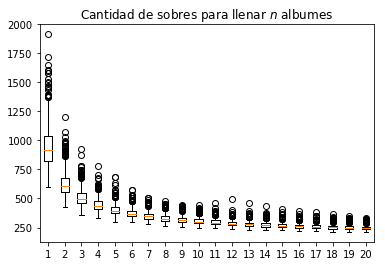

In [26]:
#Otra forma de visualizar la cantidad promedio de sobres para llenar n-albumes

plt.boxplot([simulacion_grupo[i]/i for i in range(1,CANTIDAD_DE_ALBUMES+1)])
plt.title("Cantidad de sobres para llenar $n$ albumes")
plt.show()

In [27]:
print("Llenar %d albumes costara... %2.f pesos por integrante. Que bueno es tener amigos!" % (CANTIDAD_DE_ALBUMES, (simulacion_grupo[CANTIDAD_DE_ALBUMES]/CANTIDAD_DE_ALBUMES).mean() * 15))

Llenar 20 albumes costara... 3705 pesos por integrante. Que bueno es tener amigos!
